## Ανακεφαλαίωση

- Μπορούμε να μετακινήσουμε έναν τανυστή ή ένα νευρωνικό δίκτυο `x` στη συσκευή `device` γράφοντας:
  ```py
  x.to(device)
  ```

- Οργανώνουμε τα δεδομένα μας σε ένα dataset. Η κλάση που υλοποιεί το dataset:
  1. Κληρονομεί την κλάση `torch.utils.data.Dataset`.
  2. Υλοποιεί τις μεθόδους `__init__`, `__len__` και `__getitem__`.

- Για την πρόσβαση στα δεδομένα ενός dataset χρησιμοποιούμε έναν `DataLoader` της βιβλιοθήκης `torch.utils.data`.

- Οι τανυστές οι οποίοι υποστηρίζουν αυτόματη διαφόριση έχουν το attribute `requires_grad` = `True`. Εάν ένας τανυστής `Q` προκύπτει από πράξεις άλλων τανυστών (που υποστηρίζουν αυτόματη διαφόριση), καλώντας:
  ```py
  Q.backward()
  ```
  υπολογίζεται η παράγωγος του `Q` και των τανυστών από τους οποίους προέκυψε το `Q`.

- Μπορούμε να απενεργοποιήσουμε προσωρινά την αυτόματη παρακολούθηση των παραγώγων περικλείοντας τον κώδικά μας σε ένα περιβάλλον `with torch.no_grad()`.

- Υλοποιούμε ένα νευρωνικό δίκτυο μέσω μίας κλάσης. Η κλάση αυτή:
  1. Κληρονομεί την κλάση `torch.nn.Module`.
  2. Υλοποιεί τις μεθόδους `__init__` και `forward`.
  3. **Καλεί τον constructor της parent κλάσης (`super().__init__()`).**


In [ ]:
!pip install --upgrade gdown
!gdown 1Mp3ofRjjgpawrwCxAdOM7ilCvRpsJQCD

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

Downloading...
From: https://drive.google.com/uc?id=1Mp3ofRjjgpawrwCxAdOM7ilCvRpsJQCD
To: /content/mystery.txt
100% 4.00k/4.00k [00:00<00:00, 16.6MB/s]


Όπως είδαμε στα προηγούμενα εργαστήρια, μπορούμε να χρησιμοποιήσουμε την GPU για να επιταχύνουμε τους υπολογισμούς μας, εφόσον είναι διαθέσιμη.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device}.")

Using cuda.


Ας επιστρέψουμε στο παράδειγμα του εργαστηρίου 9, με τα δειγματολειπτημένα σημεία της μυστηριώδους συνάρτησης. Αρχικά ορίζουμε την κλάση του dataset:

In [ ]:
class MysteryFunctionDataset(Dataset):
    def __init__(self, file_path):

        self.x = []
        self.y = []

        with open(file_path) as f:
            for line in f:
                x, y = line.split(',')
                x, y = float(x), float(y)

                self.x.append(x)
                self.y.append(y)

        self.x = torch.tensor(self.x, device=device)
        self.y = torch.tensor(self.y, device=device)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

Δημιουργούμε το dataset ως ένα στιγμιότυπο της κλάσης `MysteryFunctionDataset`:

In [ ]:
dataset = MysteryFunctionDataset('mystery.txt')

Και σχεδιάζουμε τα δεδομένα:

> Παρατηρήστε ότι είναι απαραίτητο να βεβαιωθούμε πως τα δεδομένα βρίσκονται στη CPU για να μπορέσουμε να τα χρησιμοποιήσουμε εκτός της PyTorch.

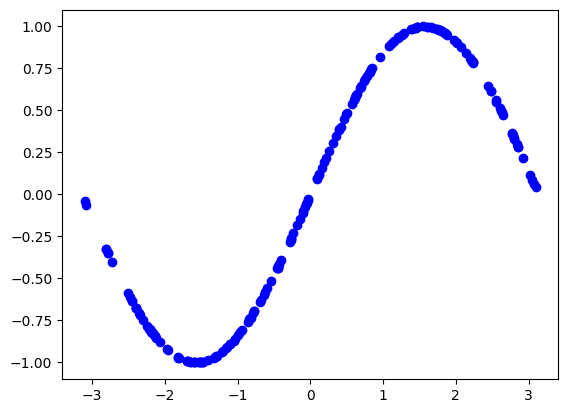

In [ ]:
for x, y in dataset:
    plt.scatter(x.to("cpu"), y.to("cpu"), c='blue')

Έστω ότι δε γνωρίζουμε ποια είναι αυτή η συνάρτηση και θέλουμε να κατασκευάσουμε ένα νευρωνικό δίκτυο που θα την προσεγγίζει.

Το δίκτυο θα πρέπει να έχει έναν νευρώνα σαν είσοδο (την τιμή x) και έναν νευρώνα στην έξοδο (την προβλεπόμενη τιμή y). Ενδιάμεσα θα χρησιμοποιήσουμε μερικούς ακόμη νευρώνες. Κάθε στοιβάδα (layer) νευρώνων θα είναι πλήρως συνδεδεμένη με την προηγούμενη. Με αυτόν τον τρόπο, ελπίζουμε τα βάρη των συνδέσεων των στοιβάδων να μοντελοποιήσουν επαρκώς τη συμπεριφορά της μυστηριώδους συνάρτησης.

Καταλήγουμε σε ένα νευρωνικό δίκτυο όπως είναι το παρακάτω:

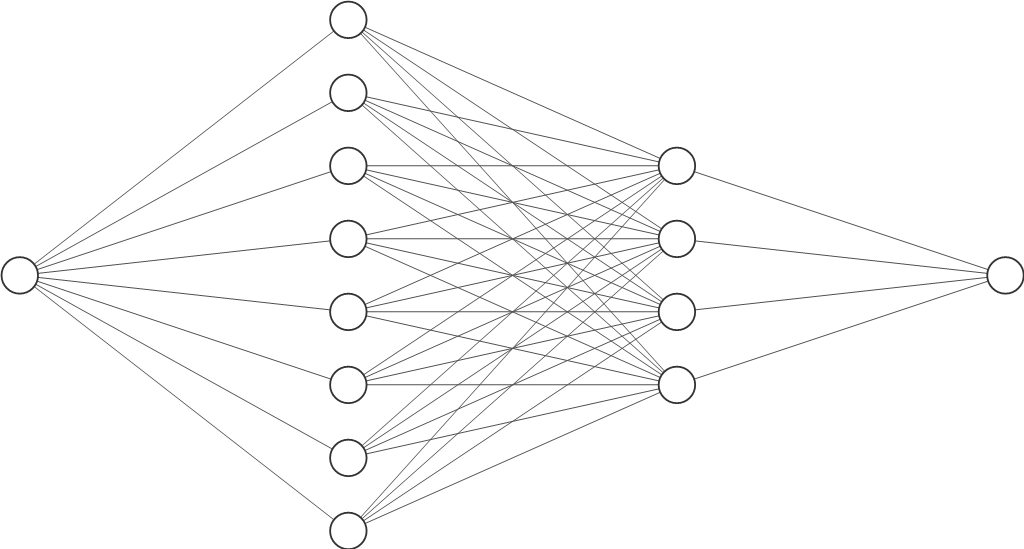


**Άσκηση 1:**

Συμπληρώστε τον ορισμό της κλάσης `FCNet`, που αναπαριστά το πλήρως διασυνδεδεμένο (fully connected) δίκτυο της παραπάνω εικόνας.

In [ ]:
# Συμπληρώστε τον κώδικα:

class FCNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )

    def forward(self, x):
        x = self.layers(x)

        return x

Έχοντας ορίσει την κλάση του νευρωνικού δικτύου, μπορούμε να δημιουργήσουμε ένα στιγμιότυπο και να το μετακινήσουμε στη συσκευή `device`.

In [ ]:
model = FCNet().to(device)
print(model)

FCNet(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
  )
)


Τα **βάρη (weights)**, που καθορίζουν πόσο ισχυρή είναι η σύνδεση των νευρώνων, και οι **πολώσεις (biases)**, που επιτρέπουν την μετατόπιση του αποτελέσματος, είναι μεγέθη για τα οποία οι βέλτιστες τιμές δεν είναι γνωστές. Η διαδικασία κατά την οποία εκτιμούμε αυτές τις τιμές ονομάζεται **εκπαίδευση (training)** του νευρωνικού δικτύου. Τα στοιχεία του νευρωνικού δικτύου τα οποία είναι άγνωστα και καλούμαστε να εκτιμήσουμε κατά την εκπαίδευση ονομάζονται **εκπαιδεύσιμες παράμετροι (trainable parameters)** του νευρωνικού δικτύου.

Επειδή είναι επιθυμητό να διατηρούμε όλες αυτές τις παραμέτρους φορτωμένες στη μνήμη, προσπαθούμε να μην είναι πολύ μεγάλο το πλήθος τους. Μπορούμε να εμφανίσουμε το πλήθος των παραμέτρων του νευρωνικού δικτύου ως εξής:

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 57 trainable parameters


Ακολουθεί μία σχηματική αναπαράσταση των παραμέτρων του νευρωνικού δικτύου, ώστε να επαληθεύσουμε το αποτέλεσμα:

```
 y1  =  W1   x1  +  b1
 __     __          __
|  |   |  |        |  |
|  |   |  |        |  |
|  |   |  |  __    |  |
|  | = |  | |__| + |  |
|  |   |  |        |  |
|  |   |  |        |  |
|  |   |  |        |  |
|__|   |__|        |__|

---------------------------------------------

 y2  =             W2             x2  +  b2
                                  __
                                 |  |
 __     __ __ __ __ __ __ __ __  |  |    __
|  |   |                       | |  |   |  |
|  | = |                       | |  | + |  |
|  |   |                       | |  |   |  |
|__|   |__ __ __ __ __ __ __ __| |  |   |__|
                                 |  |
                                 |__|

---------------------------------------------

 y3  =       W3       x3  +  b3
                      __
 __     __ __ __ __  |  |    __
|__| = |__ __ __ __| |  | + |__|
                     |  |
                     |__|



Count weights and biases:

1st layer: 8 * 1 + 8 = 16
2nd layer: 4 * 8 + 4 = 36
3rd layer: 1 * 4 + 1 =  5
                      ----
                       57
```

> <u>Σημείωση</u>: Γενικά, όσες περισσότερες παραμέτρους έχει το νευρωνικό δίκτυο, τόσο πιο περίπλοκες συμπεριφορές μπορεί να προσεγγίσει. Επομένως ένα δίκτυο με λίγες παραμέτρους ίσως να είναι αδύνατο να προβλέψει δεδομένα που ακολουθούν περίπλοκη συμπεριφορά. Από την άλλη, αν αυξήσουμε υπερβολικά το πλήθος των παραμέτρων, επιτρέπουμε στο δίκτυο να μοντελοποιήσει υπερβολικά περίπλοκες συμπεριφορές, κάνοντάς το ευαίσθητο σε θόρυβο και οδηγώντας σε overfitting.

Για την αξιολόγηση της λειτουργίας ενός νευρωνικού δικτύου, είναι χρήσιμο να μη χρησιμοποιούμε όλα τα δεδομένα για την εκπαίδευση, αλλά να κρατάμε κάποια δεδομένα κρυφά από το δίκτυο. Συνήθως χωρίζουμε τα δεδομένα μας σε τρία κομμάτια (**splits**):

- **Δεδομένα εκπαίδευσης (training data)**: Τα δίνουμε στο δίκτυο ώστε να βελτιστοποιήσει τις τιμές των βαρών και των πολώσεων. Για την εκπαίδευση χρησιμοποιούμε το 60-80% των διαθέσιμων δεδομένων.

- **Δεδομένα επαλήθευσης (validation data)**: Τα χρησιμοποιούμε κατά την εκπαίδευση για να ελέγχουμε αντικειμενικά πόσο καλά μαθαίνει το δίκτυό μας. Μπορούν να επηρεάσουν αποφάσεις που αφορούν την αρχιτεκτονική του νευρωνικού δικτύου ή την παύση της εκπαίδευσης. Χρησιμοποιούνται στη φάση της εκπαίδευσης, όμως το δίκτυο δεν μεταβάλει τις παραμέτρους του ώστε να παράγει καλύτερα αποτελέσματα στα συγκεκριμένα δεδομένα (όχι ρητά, καλύτερα αποτελέσματα παράγονται με τη βελτίωση των αποτελεσμάτων των δεδομένων εκπαίδευσης). Για επαλήθευση χρησιμοποιούμε το 10-20% των διαθέσιμων δεδομένων.

- **Δεδομένα ελέγχου (test data)**: Τα χρησιμοποιούμε μία φορά μετά το τέλος της εκπαίδευσης για να μας δείξουν αντικειμενικά πόσο καλά λειτουργεί το εκπαιδευμένο νευρωνικό δίκτυο. Τα δεδομένα αυτά είναι εντελώς κρυφά από το δίκτυο στη φάση της εκπαίδευσης. Για έλεγχο χρησιμοποιούμε το 10-20% των διαθέσιμων δεδομένων.

Με τη βοήθεια της PyTorch μπορούμε να διαιρέσουμε ένα dataset σε καινούργια datasets με τη συνάρτηση `random_split`, δίνοντας τον επιθυμητή αναλογία των δεδομένων στα καινούργια datasets. Έτσι, μπορούμε να χωρίσουμε το dataset σε training/validation/test data με αναλογία 0.7/0.15/0.15.

In [ ]:
train_data, valid_data, test_data = random_split(dataset, (0.7, 0.15, 0.15))

Κατά τη δημιουργία και την εκπαίδευση ενός νευρωνικού δικτύου, καλούμαστε να ορίσουμε κάποιες αριθμητικές τιμές οι οποίες δεν αλλάζουν κατά την εκπαίδευση. Οι τιμές αυτές ονομάζονται **υπερπαράμετροι (hyperparameters)**.

Για λόγους οργάνωσης θα θέσουμε όλες τις υπερπαραμέτρους στο επόμενο κελί, θα εξηγήσουμε, όμως, τη σημασία καθεμιάς όταν έρθει η ώρα να τη χρησιμοποιήσουμε.

In [ ]:
# Hyperparameters

learning_rate = 1e-3
regularization = 1e-3
batch_size = 10
epochs = 1000

Όπως έχουμε δει, για να μπορέσουν να χρησιμοποιηθούν τα δεδομένα μας από το νευρωνικό δίκτυο, θα χρειαστεί να δημιουργήσουμε έναν `DataLoader` για κάθε dataset.

Επειδή σπάνια εισάγουμε στο νευρωνικό δίκτυο ένα-ένα τα δείγματα, θα χρησιμοποιήσουμε batches (το να εισάγουμε πολλά δεδομένα στις στοιβάδες του νευρωνικού δικτύου επιταχύνει την εκπαίδευση και σε ορισμένες περιπτώσεις βοηθάει στην αποφυγή του overfitting). Το *μέγεθος του batch* είναι μία *υπερπαράμετρος*.

Επίσης, τα δεδομένα εκπαίδευσης θα τα παρέχουμε στο νευρωνικό δίκτυο ανακατεμένα, προκειμένου να αποφύγουμε την εκμάθηση μοτίβων που έχουν να κάνουν με τη σειρά που εμφανίζονται τα δείγματα. Αυτό δεν είναι απαραίτητο να το κάνουμε για τα δεδομένα επαλήθευσης και ελέγχου, αφού αυτά δεν επηρεάζουν τις εκπαιδεύσιμες παραμέτρους.

In [ ]:
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

Για να μπορέσουμε να ποσοτικοποιήσουμε πόσο απέχει η λύση που μας δίνει το νευρωνικό δίκτυο από την πραγματική λύση, πρέπει να ορίσουμε μία **συνάρτηση απωλειών (loss function)**.

Η PyTorch μάς παρέχει ήδη ορισμένες πολλές [συναρτήσεις απωλειών](https://pytorch.org/docs/stable/nn.html#loss-functions) για πολλές διαφορετικές κατηγορίες προβλημάτων. Είναι εξαιρετικά σπάνιο να χρειαστεί να ορίσουμε κάποια καινούργια συνάρτηση απωλειών.

Για το παρόν πρόβλημα, μπορούμε να χρησιμοποιήσουμε μία συνάρτηση που μας δίνει τη διαφορά της τιμής που προέβλεψε το δίκτυο από την πραγματική. Μία τέτοια συνάρτηση, που υλοποιεί το L2 loss, είναι η συνάρτηση `torch.nn.MSELoss`.

In [ ]:
loss_fn = nn.MSELoss().to(device)

Ακόμη, θα χρειαστεί να ορίσουμε την τεχνική με την οποία θα γίνει η βελτιστοποίηση των παραμέτρων, χρησιμοποιώντας κάποιον optimizer. Εδώ, θα χρησιμοποιήσουμε τον `torch.optim.SGD`, που υλοποιεί τον αλγόριθμο *Stochastic Gradient Descent*, που έχουμε εξετάσει στο μάθημα.

Ο optimizer λαμβάνει ως όρισμα μία υπερπαράμετρο που είναι η **ταχύτητα εκμάθησης (learning rate)**. Μεγαλύτερη ταχύτητα εκμάθησης μειώνει το χρόνο εκμάθησης, ενέχει όμως τον κίνδυνο να διορθώσουμε υπερβολικά κάποιο λάθος, χάνοντας κάποιο ακρότατο κατά τη βελτιστοποίηση. Οι τυπικές τιμές της ταχύτητας εκμάθησης είναι μεταξύ 0.000001 και 1.

Προαιρετικά, θέτοντας το όρισμα `weight_decay`, μπορούμε να ενεργοποιήσουμε το **regularization loss**, που είναι μία μέθοδος αποφυγής του overfitting. Το βάρος του regularization loss είναι και αυτό μία υπερπαράμετρος με τυπικές τιμές μεταξύ 0.00001 και 0.1.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=regularization)

Συχνά οργανώνουμε το βρόχο εκπαίδευσης σε μία συνάρτηση, όπως η ακόλουθη. Τα βασικά σημεία του βρόχου εκπαίδευσης είναι τα παρακάτω:
1. Θέτουμε το νευρωνικό δίκτυο σε λειτουργία εκπαίδευσης. Αυτό χρειάζεται επειδή κάποιες στοιβάδες συμπεριφέρονται διαφορετικά κατά την εκπαίδευση απ’ ό,τι συμπεριφέρονται κατά την αξιολόγηση των αποτελεσμάτων.
2. Για κάθε batch δεδομένων:
   1. Προετοιμάζουμε τα δεδομένα. Αλλάζουμε τις διαστάσεις τους, τον τύπο τους ή τη συσκευή τους ώστε να είναι έτοιμα να εισαχθούν στο δίκτυο.
   2. Εκτελούμε το forward pass:<br>
      Εισάγουμε το batch των δεδομένων στο νευρωνικό δίκτυο και λαμβάνουμε την πρόβλεψή του.<br>
      Υπολογίζουμε τον τανυστή των απωλειών που δείχνει πόσο λάθος είναι η πρόβλεψη του δικτύου.
   3. Εκτελούμε το backward pass:<br>
      Καλούμε τη μέθοδο backward στον τανυστή απωλειών ώστε να ενημερωθούν οι παράγωγοι όλων των επιμέρους τανυστών (με requires_grad=True) που οδήγησαν στην πρόβλεψη.<br>
      Καλούμε τη μέθοδο step του optimizer ώστε να ενημερωθούν οι παράμετροι του νευρωνικού δικτύου βάσει των παραγώγων που υπολογίστηκαν.<br>
      Τέλος, καλούμε τη μέθοδο zero_grad του optimizer ώστε να μηδενιστούν οι παράγωγοι των εκπαιδεύσιμων παραμέτρων του δικτύου.
   4. (Προαιρετικά) Τυπώνουμε μία περίληψη της κατάστασης εκπαίδευσης ώστε να βλέπουμε την πρόοδό της.

In [ ]:
def train(dataloader, model, loss_fn, optimizer):

    # Set the network to training mode
    model.train()

    size = len(dataloader.dataset)

    for batch, (X, y) in enumerate(dataloader):

        # Prepare the data
        X = X.unsqueeze(1).to(torch.float)
        y = y.unsqueeze(1).to(torch.float)

        # Forward pass
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Print a summary every 5 batches
        if batch % 5 == 4:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

Κατ’ αναλογία με το βρόχο εκπαίδευσης μπορούμε να ορίσουμε μία συνάρτηση που υλοποιεί το βρόχο αξιολόγησης. Τα βασικά σημεία του βρόχου αξιολόγησης είναι τα παρακάτω:
1. Θέτουμε το νευρωνικό δίκτυο σε λειτουργία αξιολόγησης. Αυτό χρειάζεται επειδή κάποιες στοιβάδες συμπεριφέρονται διαφορετικά κατά την εκπαίδευση απ’ ό,τι συμπεριφέρονται κατά την αξιολόγηση των αποτελεσμάτων.
2. Για κάθε batch δεδομένων:
   1. Προετοιμάζουμε τα δεδομένα. Αλλάζουμε τις διαστάσεις τους, τον τύπο τους ή τη συσκευή τους ώστε να είναι έτοιμα να εισαχθούν στο δίκτυο.
   2. Εκτελούμε το forward pass:<br>
      Εισάγουμε το batch των δεδομένων στο νευρωνικό δίκτυο και λαμβάνουμε την πρόβλεψή του.<br>
      Υπολογίζουμε τον τανυστή των απωλειών που δείχνει πόσο λάθος είναι η πρόβλεψη του δικτύου.
3. Υπολογίζουμε το μέσο όρο των απωλειών.


In [ ]:
def evaluate(dataloader, model, loss_fn):

    # Set the network to evaluation mode
    model.eval()

    num_batches = len(dataloader)
    test_loss = 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:

            # Prepare the data
            X = X.unsqueeze(1).to(torch.float)
            y = y.unsqueeze(1).to(torch.float)

            # Forward pass
            pred = model(X)
            test_loss += loss_fn(pred, y).item()

    test_loss /= num_batches
    print(f"Avg loss: {test_loss:>8f} \n")

Τα δείγματα των δεδομένων περνούν σε batches μέσα από τις στοιβάδες του νευρωνικού δικτύου. Μόλις όλα τα δεδομένα περάσουν από το δίκτυο, λέμε ότι ολοκληρώθηκε μία **εποχή (epoch)**.

Τα δεδομένα δεν περνούν από τις στοιβάδες του νευρωνικού δικτύου μία μόνο φορά, δηλαδή η εκπαίδευση δε διαρκεί μονάχα μία εποχή. Ο *αριθμός των εποχών*, δηλαδή ο αριθμός των επαναλήψεων εισόδου του dataset στο δίκτυο, αποτελεί μία ακόμη υπερπαράμετρο.

Κατά τη διάρκεια μίας εποχής:
1. Εισάγουμε τα δεδομένα εκπαίδευσης στο νευρωνικό δίκτυο, για βελτιστοποίηση των εκπαιδεύσιμων παραμέτρων.
2. Αφού έχουν εισαχθεί όλα τα δεδομένα και αμέσως πριν το τέλος της εποχής, εισάγουμε τα δεδομένα επαλήθευσης στο δίκτυο, για την αξιολόγηση της πορείας της εκπαίδευσης.

In [ ]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    print("VALIDATION:", end=" ")
    evaluate(valid_dataloader, model, loss_fn)
print("Finished training!")

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.

Epoch 168
-------------------------------
loss: 0.044506  [   50/  140]
loss: 0.032149  [  100/  140]
VALIDATION: Avg loss: 0.117360 

Epoch 169
-------------------------------
loss: 0.121308  [   50/  140]
loss: 0.066645  [  100/  140]
VALIDATION: Avg loss: 0.117232 

Epoch 170
-------------------------------
loss: 0.128130  [   50/  140]
loss: 0.125990  [  100/  140]
VALIDATION: Avg loss: 0.117090 

Epoch 171
-------------------------------
loss: 0.066868  [   50/  140]
loss: 0.052647  [  100/  140]
VALIDATION: Avg loss: 0.116960 

Epoch 172
-------------------------------
loss: 0.175037  [   50/  140]
loss: 0.087381  [  100/  140]
VALIDATION: Avg loss: 0.116843 

Epoch 173
-------------------------------
loss: 0.037750  [   50/  140]
loss: 0.053756  [  100/  140]
VALIDATION: Avg loss: 0.116730 

Epoch 174
-------------------------------
loss: 0.066395  [   50/  140]
loss: 0.126092  [  100/  140]
VALIDATION: Avg loss: 0.116604 


Μετά το τέλος της εκπαίδευσης, μπορούμε να εκτελέσουμε το βρόχο αξιολόγησης και στα δεδομένα ελέγχου, ώστε να εκτιμήσουμε την ποιότητα του μοντέλου που κατασκευάσαμε.

In [ ]:
evaluate(test_dataloader, model, loss_fn)

Avg loss: 0.058002 



Ανάλογα με το πρόβλημα, μπορούμε συνήθως να κάνουμε και επιπλέον δοκιμές και απεικονίσεις χρησιμοποιώντας τα δεδομένα ελέγχου για να αποκτήσουμε μία καλύτερη αίσθηση της ακρίβειας του μοντέλου.

**Άσκηση 2:**

Ο παρακάτω κώδικας εμφανίζει τα δεδομένα ελέγχου τα οποία παρέχει ο `test_dataloader`, με μπλε χρώμα.

Συμπληρώστε τον κώδικα ώστε να εμφανίζονται οι προβλέψεις του νευρωνικού δικτύου για τα δεδομένα αυτά, με κόκκινο χρώμα.

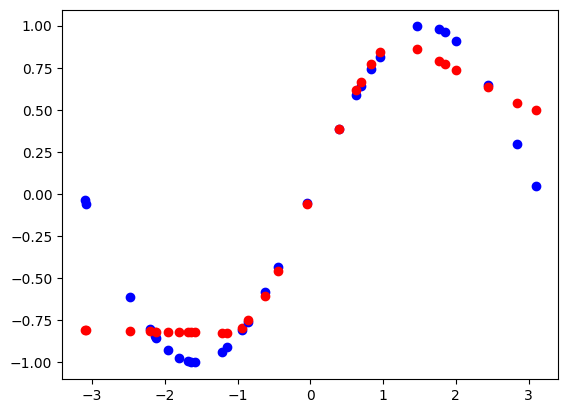

In [ ]:
model.eval()

with torch.no_grad():
    for X,y in test_dataloader:
        X = X.unsqueeze(1).to(torch.float)
        y = y.unsqueeze(1).to(torch.float)

        plt.scatter(X.to("cpu"), y.to("cpu"), c="blue")

        pred = model(X)

        plt.scatter(X.to("cpu"), pred.to("cpu"), c="red")

## Κατηγοριοποίηση

Ένα διαδεδομένο πρόβλημα μηχανικής μάθησης είναι η **κατηγοριοποίηση εικόνων (image classification)**. Σε τέτοια προβλήματα μάς δίνεται ένα σύνολο εικόνων που ανήκουν σε μία από έναν αριθμό κατηγοριών, που ονομάζονται **κλάσεις (classes)**.

Υπάρχουν πολλά datasets εικόνων που είναι κατάλληλα για κατηγοριοποίηση. Εμείς θα χρησιμοποιήσουμε το *MNIST dataset*, το οποίο περιλαμβάνει ασπρόμαυρες εικόνες χειρόγραφων ψηφίων. Κάθε εικόνα συνοδεύεται από ένα **label** που εξηγεί ποιο ψηφίο αναπαριστά η εικόνα.

Μπορούμε να κατεβάσουμε τα δεδομένα του MNIST dataset απευθείας, χρησιμοποιώντας τη βιβλιοθήκη `torchvision`:

In [ ]:
from torchvision import datasets, transforms

train_data = datasets.MNIST(root = '.', train = True, transform = transforms.ToTensor(), download = True)
test_data = datasets.MNIST(root = '.', train = False, transform = transforms.ToTensor(), download = True)

> Η υλοποίηση του MNIST dataset από την PyTorch κάνει περίπλοκη τη χρήση GPU. Για λόγους απλότητας, δε θα χρησιμοποιήσουμε την GPU στο εξής.

In [ ]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: .
    Split: Test
    StandardTransform
Transform: ToTensor()


Καθένα από τα datasets περιλαμβάνει ένα γνώρισμα `data` που περιέχει τις εικόνες και ένα γνώρισμα `targets` που περιέχει τα ψηφία στα οποία αντιστοιχεί κάθε εικόνα.

In [ ]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [ ]:
print(train_data.targets.size())

torch.Size([60000])


Επειδή το MNIST dataset δεν περιέχει μόνο του δεδομένα επαλήθευσης, μπορούμε να κρατήσουμε ένα υποσύνολο των δεδομένων εκπαίδευσης ως δεδομένα επαλήθευσης.

In [ ]:
train_data, valid_data = random_split(train_data, (50_000, 10_000))

Χρησιμοποιώντας τη βιβλιοθήκη `matplotlib.pyplot` μπορούμε να εμφανίσουμε μερικά τυχαία δείγματα του dataset.

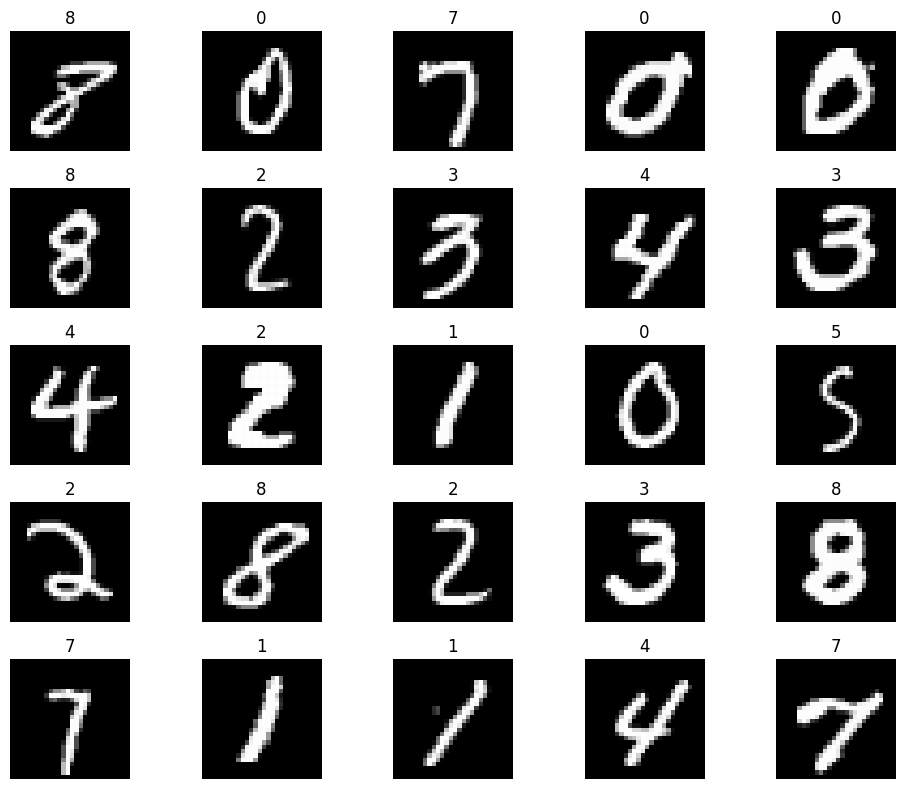

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(cols * rows):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i + 1)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
figure.tight_layout()
plt.show()

Ας ακολουθήσουμε την ίδια λογική με το προηγούμενο πρόβλημα και ας κατασκευάσουμε ένα πλήρως συνδεδεμένο νευρωνικό δίκτυο για την κατηγοριοποίηση των εικόνων, όπως το παρακάτω:

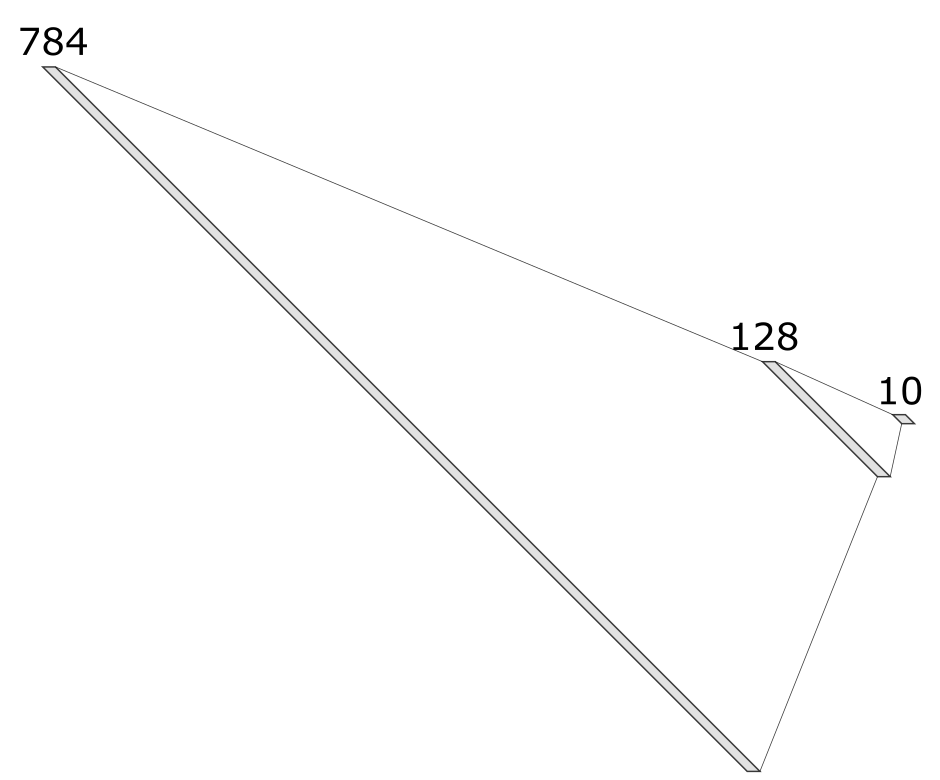

Στην είσοδο δίνουμε τις τιμές της φωτεινότητας καθενός pixel της εικόνας (28x28=784) και στην έξοδο λαμβάνουμε το "σκορ" για καθεμία από τις 10 κλάσεις των διαφορετικών ψηφίων, αφού περάσουμε από μία ενδιάμεση στοιβάδα με 128 νευρώνες.

**Άσκηση 3:**

Συμπληρώστε τον ορισμό της κλάσης `FCNet2`, που αναπαριστά το πλήρως διασυνδεδεμένο (fully connected) δίκτυο της παραπάνω εικόνας.

In [ ]:
# Συμπληρώστε τον κώδικα:

class FCNet2(nn.Module):
    def __init__(self):
        super().__init__()

        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):

        x = self.layers(x)

        return x

Έχοντας ορίσει την κλάση του νευρωνικού δικτύου, μπορούμε να δημιουργήσουμε ένα στιγμιότυπο και να το μετακινήσουμε στη συσκευή `device`.

In [ ]:
model = FCNet2()
print(model)

FCNet2(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


Ας δούμε πόσες εκπαιδεύσιμες παραμέτρους έχει αυτό το δίκτυο:

In [ ]:
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 101,770 trainable parameters


Στη συνέχεια, ορίζουμε τις υπερπαραμέτρους:

In [ ]:
# Hyperparameters

learning_rate = 1e-3
regularization = 1e-3
batch_size = 100
epochs = 3

**Άσκηση 4:**

Ορίστε τους κατάλληλους DataLoaders προκειμένου να εισάγουμε τα δεδομένα του MNIST dataset στο νευρωνικό δίκτυο.

In [ ]:
# Συμπληρώστε τον κώδικα:

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

Προσέξτε ότι από το νευρωνικό δίκτυο προκύπτουν 10 αριθμοί τους οποίους μεταχειριζόμαστε ως το σκορ που αντιστοιχεί σε κάθε ψηφίο. Οι αριθμοί αυτοί μπορούν να βρίσκονται οπουδήποτε στο διάστημα $(-\infty, +\infty)$ (τους αποκαλούμε και **logits**).

Είναι σύνηθες να θέλουμε να αντιστοιχίσουμε κάθε αριθμό στην πιθανότητα να έχουμε την εκάστοτε κλάση, επομένως να τους κανονικοποιήσουμε στο διάστημα $[0, 1]$. Για να το επιτύχουμε, χρησιμοποιούμε τη συνάρτηση **softmax**.

> Αν $z$ είναι το διάνυσμα εξόδου του νευρωνικού δικτύου, για την κλάση $i$:
> $$\text{softmax}(z)_i = \frac{e^{z_i}}{\sum_{j=1}^K{e^{z_j}}},$$
> όπου $K$ είναι το πλήθος των κλάσεων.

Η PyTorch υλοποιεί τη συμπεριφορά της συνάρτησης softmax μέσω της συνάρτησης `torch.nn.Softmax`.

Το αποτέλεσμα της συνάρτησης softmax, που βρίσκεται εντός του διαστήματος $[0, 1]$, το προωθούμε συνήθως σε μία συνάρτηση λογαρίθμου για να λάβουμε τους λογαρίθμους των πιθανοτήτων (*log probabilities*).

Η PyTorch μας δίνει τη δυνατότητα να συνδυάσουμε τη συνάρτηση softmax και τη συνάρτηση λογαρίθμου παρέχοντας μία συνάρτηση που κάνει και τα δύο: την `torch.nn.LogSoftmax`.

Η συνάρτηση απωλειών που χρησιμοποιούμε σε αυτή την περίπτωση (για την κατηγοριοποίηση δειγμάτων σε κλάσεις) ονομάζεται **negative log likelihood loss (NLLLoss)** και η PyTorch την υλοποιεί μέσω της συνάρτησης `torch.nn.NLLLoss`.

Εναλλακτικά, η PyTorch παρέχει μία συνάρτηση απωλειών που κάνει όλα όσα περιγράψαμε: υπολογίζει τους λογαρίθμους των πιθανοτήτων της συνάρτησης softmax και ύστερα υπολογίζει το negative log likelihood loss. Η συνάρτηση αυτή ονομάζεται **Cross-Entropy Loss** και είναι αυτή που χρησιμοποιούμε παρακάτω.

In [ ]:
loss_fn = nn.CrossEntropyLoss()

Για τη βελτιστοποίηση χρησιμοποιούμε τον αλγόριθμο Stochastic Gradient Descent, όπως και παραπάνω, με regularization loss.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=regularization)

Η συνάρτηση που υλοποιεί το βρόχο εκπαίδευσης είναι παρόμοια με προηγουμένως.

In [ ]:
def train(dataloader, model, loss_fn, optimizer):

    # Set the model to training mode
    model.train()

    size = len(dataloader.dataset)

    for batch, (X, y) in enumerate(dataloader):

        # Prepare the data
        X = X.to(torch.float)

        # Forward pass
        logits = model(X)
        loss = loss_fn(logits, y)

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Print a summary every 100 batches
        if batch % 100 == 99:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

Η συνάρτηση που υλοποιεί το βρόχο αξιολόγησης είναι επίσης παρόμοια με προηγουμένως.

Αντίθετα με το προηγούμενο πρόβλημα, όμως, σε προβλήματα κατηγοριοποίησης μπορούμε να υπολογίσουμε μία επιπλέον χρήσιμη μετρική: το ποσοστό των δειγμάτων που το δίκτυο κατάφερε να αντιστοιχήσει στη σωστή κλάση/κατηγορία, δηλαδή την **ακρίβεια** του μοντέλου.

In [ ]:
def evaluate(dataloader, model, loss_fn):

    # Set the model to evaluation mode
    model.eval()

    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:

            # Prepare the data
            X = X.to(torch.float)

            # Forward pass
            logits = model(X)
            test_loss += loss_fn(logits, y).item()
            correct += (logits.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Έπειτα, μπορούμε να καλέσουμε τις παραπάνω συναρτήσεις, ώστε να εκπαιδεύσουμε το νευρωνικό δίκτυο, αξιολογώντας την πορεία της εκπαίδευσης έπειτα από κάθε εποχή.

In [ ]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    print("VALIDATION:", end=" ")
    evaluate(valid_dataloader, model, loss_fn)
print("Finished training!")

Epoch 1
-------------------------------
loss: 2.303300  [10000/50000]
loss: 2.276509  [20000/50000]
loss: 2.258981  [30000/50000]
loss: 2.228785  [40000/50000]
loss: 2.214689  [50000/50000]
VALIDATION: Accuracy: 35.0%, Avg loss: 2.213510 

Epoch 2
-------------------------------
loss: 2.168540  [10000/50000]
loss: 2.163503  [20000/50000]
loss: 2.162682  [30000/50000]
loss: 2.134061  [40000/50000]
loss: 2.119806  [50000/50000]
VALIDATION: Accuracy: 53.9%, Avg loss: 2.104857 

Epoch 3
-------------------------------
loss: 2.095021  [10000/50000]
loss: 2.099876  [20000/50000]
loss: 2.052668  [30000/50000]
loss: 1.999231  [40000/50000]
loss: 1.989281  [50000/50000]
VALIDATION: Accuracy: 62.3%, Avg loss: 1.976972 

Finished training!


**Άσκηση 5:**

Ελέγξτε τις επιδόσεις του νευρωνικού δικτύου στα δεδομένα ελέγχου.

In [ ]:
# Γράψτε εδώ τη λύση

evaluate(test_dataloader, model, loss_fn)

Accuracy: 62.3%, Avg loss: 1.976972 



Ο παρακάτω κώδικας σάς επιτρέπει να ζωγραφίσετε έναν αριθμό και να τον αποθηκεύσετε την εικόνα στο αρχείο `drawing.png`.

In [ ]:
# @title Create a canvas to draw on
# adapted from https://gist.github.com/melMass/d59bd9c13ba9cf10790ef8a8c5962de7
from IPython.display import HTML
from google.colab import output
from base64 import b64decode
import os
import shutil
import uuid
COLAB_HTML_ROOT = "/usr/local/share/jupyter/nbextensions/google.colab/"

def moveToExt(filename:str) -> str:
  if not os.path.exists(filename):
    print("Image file not found")
    return None

  target = os.path.basename(filename)
  target = os.path.join(COLAB_HTML_ROOT, str(uuid.uuid4()) + target)

  shutil.copyfile(filename,target)
  # print("moved to ext")
  return target


def draw(filename='drawing.png', color="black", bg_color="transparent", w=256, h=256, line_width=1, loop=False, scale=1):
  real_filename = os.path.realpath(filename)
  html_filename = real_filename
  html_real_filename = html_filename
  if os.path.exists(real_filename):
    html_real_filename = moveToExt(real_filename)
    html_filename = html_real_filename.replace("/usr/local/share/jupyter","")


  canvas_html = f"""
  <canvas width={w} height={h} style=width:{w*scale}px;height:{h*scale}px;image-rendering:pixelated></canvas>
  <div class="slidecontainer">
  <label for="lineWidth" id="lineWidthLabel">{line_width}px</label>
    <input type="range" min="1" max="5" value="1" class="slider" id="lineWidth">
  </div>

  <div class="buttoncontainer">
    <button id="reset">Reset</button>
    <button id="save">Save</button>
    <button id="exit">Exit</button>
  </div>
  <script>

   function loadImage(url) {{
  return new Promise(r => {{ let i = new Image(); i.onload = (() => r(i)); i.src = url; }});
}}


    var canvas = document.querySelector('canvas')
    var ctx = canvas.getContext('2d')
    ctx.lineWidth = {line_width}
    ctx.fillStyle = "{bg_color}";

    ctx.fillRect(0, 0, canvas.width, canvas.height);
    ctx.strokeStyle = "{color}";


    var slider = document.getElementById("lineWidth");
    slider.oninput = function() {{
      ctx.lineWidth = this.value;
      lineWidthLabel.innerHTML = `${{this.value}}px`
    }}


    var clear_button = document.querySelector('#reset')
    var button = document.querySelector('#save')
    var exit_button = document.querySelector('#exit')

    var mouse = {{x: 0, y: 0}}
    canvas.addEventListener('mousemove', function(e) {{
      mouse.x = (e.pageX - this.offsetLeft) / {scale}
      mouse.y = (e.pageY - this.offsetTop) / {scale}
    }})
    canvas.onmousedown = ()=>{{
      ctx.beginPath()
      ctx.moveTo(mouse.x, mouse.y)
      canvas.addEventListener('mousemove', onPaint)
    }}
    canvas.onmouseup = ()=>{{
      canvas.removeEventListener('mousemove', onPaint)
    }}
    var onPaint = ()=>{{
      ctx.lineTo(mouse.x, mouse.y)
      ctx.stroke()
    }}

    clear_button.onclick = ()=>{{
        console.log('Clearing Screen')
        ctx.clearRect(0, 0, canvas.width, canvas.height);
        ctx.fillRect(0, 0, canvas.width, canvas.height);
      }}
      canvas.addEventListener('load', function() {{
      console.log('All assets are loaded')
    }})
    var data = new Promise(resolve=>{{
      button.onclick = ()=>{{
        document.querySelector('.slidecontainer').remove()
        document.querySelector('.buttoncontainer').remove()
        onPaint = null
        resolve(canvas.toDataURL('image/png'))
      }}
      exit_button.onclick = ()=>{{
      document.querySelector('.slidecontainer').remove()
      document.querySelector('.buttoncontainer').remove()
      onPaint = null
      resolve()
    }}

    }})

    // window.onload = async ()=>{{
    //   console.log("loaded")
    //   let img = await loadImage('{html_filename}');
    //   ctx.drawImage(img, 0, 0);
    // }}


  </script>
  """

  display(HTML(canvas_html))
  # print("Evaluating JS")

  data = output.eval_js("data")
  if data:
    binary = b64decode(data.split(',')[1])
    # filename = html_real_filename if loop else filename
    with open(filename, 'wb') as f:
      f.write(binary)
    #return len(binary)
    if loop:
      output.clear()
    print("Sketch saved")

In [ ]:
draw(w=28, h=28, color='white', bg_color='black', scale=10)

Sketch saved


Ο παρακάτω κώδικας διαβάζει την εικόνα `drawing.png` και μας δίνει την πρόβλεψη του νευρωνικού δικτύου για αυτή.

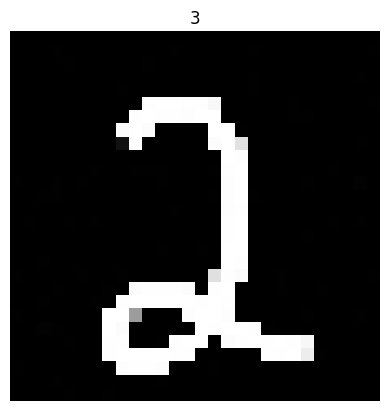

In [ ]:
from PIL import Image

# Load the image
image = Image.open('drawing.png').convert('L')
transform = transforms.PILToTensor()
img_tensor = transform(image) / 255

# Forward pass
model.eval()
prediction = model(img_tensor)
number_pred = prediction.argmax(1).item()

# Show the image
plt.imshow(image, cmap='gray')
plt.title(f'{number_pred}')
plt.axis('off')
plt.show()

### Συνελικτικό Νευρωνικό Δίκτυο (Convolutional Neural Network - CNN)

Ας προσπαθήσουμε να επιλύσουμε το ίδιο πρόβλημα χρησιμοποιώντας ένα **συνελικτικό νευρωνικό δίκτυο (CNN)**, όπως το παρακάτω:

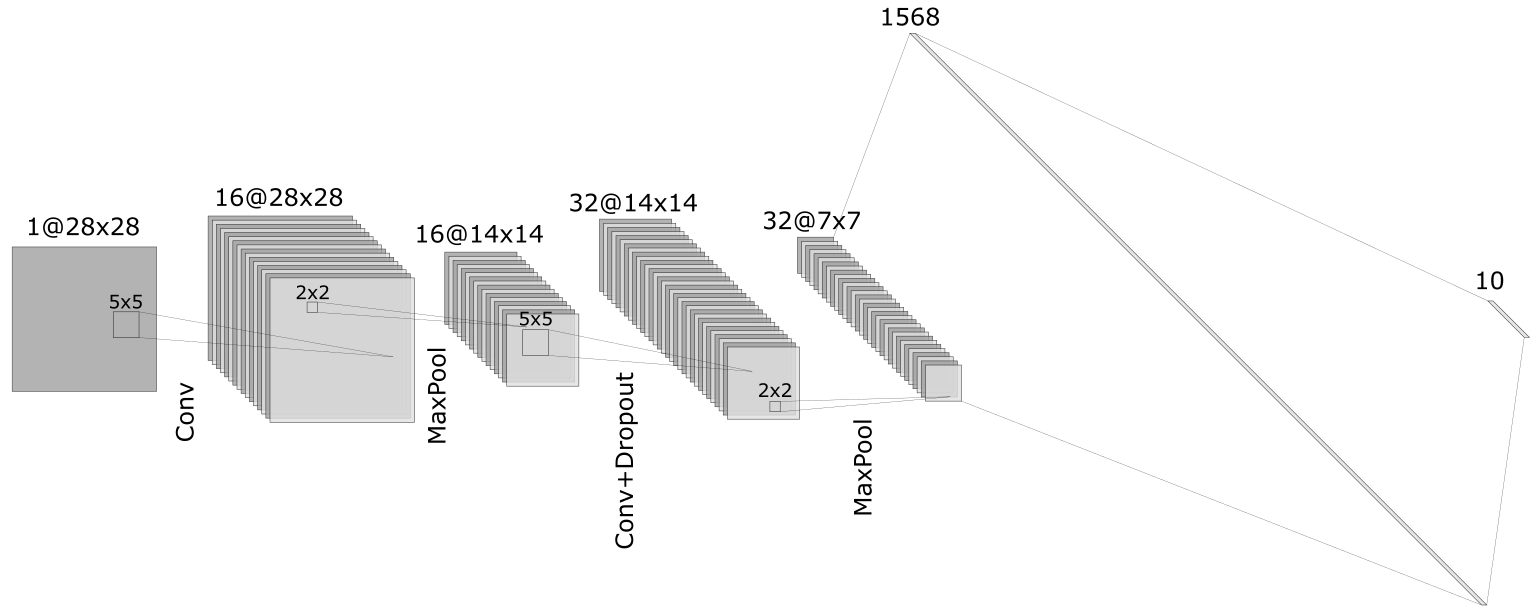

Ένας όρος που δεν έχετε δει εκτενώς στο μάθημα είναι το **dropout**. Το dropout είναι μία ειδική στοιβάδα που χρησιμοποιείται για κανονικοποίηση και αποφυγή του overfitting. Η στοιβάδα dropout θέτει τυχαία (με ρυθμιζόμενη πιθανότητα) και προσωρινά κάποια από τα βάρη του νευρωνικού δικτύου ίσα με 0, ουσιαστικά διαγράφοντας (dropping out) κάποιους νευρώνες.

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.Dropout2d(),
            nn.MaxPool2d(2),
            nn.ReLU()
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(1568, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.reshape(-1, 1568)
        x = self.fc_layers(x)

        return x

In [ ]:
modelCNN = CNN()
print(modelCNN)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): Dropout2d(p=0.5, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=1568, out_features=10, bias=True)
  )
)


Εάν μετρήσουμε τις εκπαιδεύσιμες παραμέτρους του νευρωνικού δικτύου, βλέπουμε ότι αυτές είναι λιγότερες από το 1/3 του προηγούμενου δικτύου.

In [ ]:
print(f'The model has {count_parameters(modelCNN):,} trainable parameters')

The model has 28,938 trainable parameters


Εδώ, θα χρησιμοποιήσουμε το dropout ως το μόνο είδος regularization, δε θα χρησιμοποιήσουμε, δηλαδή, L2 regularization.

Ακόμη, χωρίς να εξηγήσουμε πώς δουλεύει, θα χρησιμοποιήσουμε τον **Adam optimizer**, που συχνά επιταχύνει τη βελτιστοποίηση.

In [ ]:
optimizerCNN = torch.optim.Adam(modelCNN.parameters(), lr=learning_rate)

In [ ]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, modelCNN, loss_fn, optimizerCNN)
    print("VALIDATION:", end=" ")
    evaluate(valid_dataloader, modelCNN, loss_fn)
print("Finished training!")

Epoch 1
-------------------------------
loss: 0.253100  [10000/50000]
loss: 0.200784  [20000/50000]
loss: 0.266330  [30000/50000]
loss: 0.059815  [40000/50000]
loss: 0.048623  [50000/50000]
VALIDATION: Accuracy: 97.6%, Avg loss: 0.078521 

Epoch 2
-------------------------------
loss: 0.115675  [10000/50000]
loss: 0.099630  [20000/50000]
loss: 0.058147  [30000/50000]
loss: 0.046437  [40000/50000]
loss: 0.083137  [50000/50000]
VALIDATION: Accuracy: 98.3%, Avg loss: 0.052970 

Epoch 3
-------------------------------
loss: 0.062769  [10000/50000]
loss: 0.122301  [20000/50000]
loss: 0.157472  [30000/50000]
loss: 0.039240  [40000/50000]
loss: 0.018845  [50000/50000]
VALIDATION: Accuracy: 98.6%, Avg loss: 0.042831 

Finished training!


**Άσκηση 6:**

Ελέγξτε τις επιδόσεις του νευρωνικού δικτύου στα δεδομένα ελέγχου.

In [ ]:
# Γράψτε εδώ τη λύση

evaluate(test_dataloader, modelCNN, loss_fn)

Accuracy: 98.6%, Avg loss: 0.042831 



Δοκιμάστε να ζωγραφίσετε πάλι ένα ψηφίο και δείτε ποιο ψηφίο πιστεύει το νευρωνικό δίκτυο ότι ζωγραφίσατε.

In [ ]:
draw(w=28, h=28, color='white', bg_color='black', scale=10)

Sketch saved


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1354: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


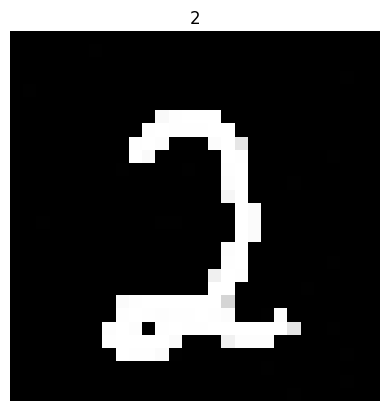

In [ ]:
from PIL import Image

# Load the image
image = Image.open('drawing.png').convert('L')
transform = transforms.PILToTensor()
img_tensor = transform(image) / 255

# Forward pass
modelCNN.eval()
prediction = modelCNN(img_tensor)
number_pred = prediction.argmax(1).item()

# Show the image
plt.imshow(image, cmap='gray')
plt.title(f'{number_pred}')
plt.axis('off')
plt.show()

**Άσκηση 7:**

Δείξτε δίπλα-δίπλα τα αποτελέσματα των δύο νευρωνικών δικτύων.

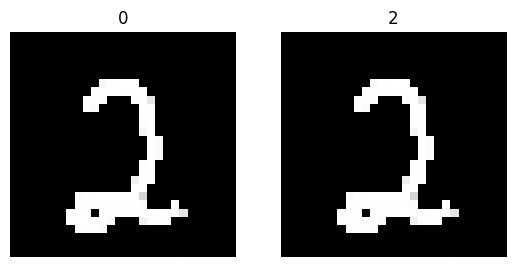

In [ ]:
# Γράψτε εδώ τη λύση

from PIL import Image

# Load the image
image = Image.open('drawing.png').convert('L')
transform = transforms.PILToTensor()
img_tensor = transform(image) / 255

# Forward pass
model.eval()
modelCNN.eval()

prediction = model(img_tensor)
predictionCNN = modelCNN(img_tensor)

number_pred = prediction.argmax(1).item()
number_predCNN = predictionCNN.argmax(1).item()

# Show the images
figure = plt.figure()

figure.add_subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f'{number_pred}')
plt.axis('off')

figure.add_subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.title(f'{number_predCNN}')
plt.axis('off')

plt.show()

#### BONUS: Τι βλέπει το νευρωνικό δίκτυο

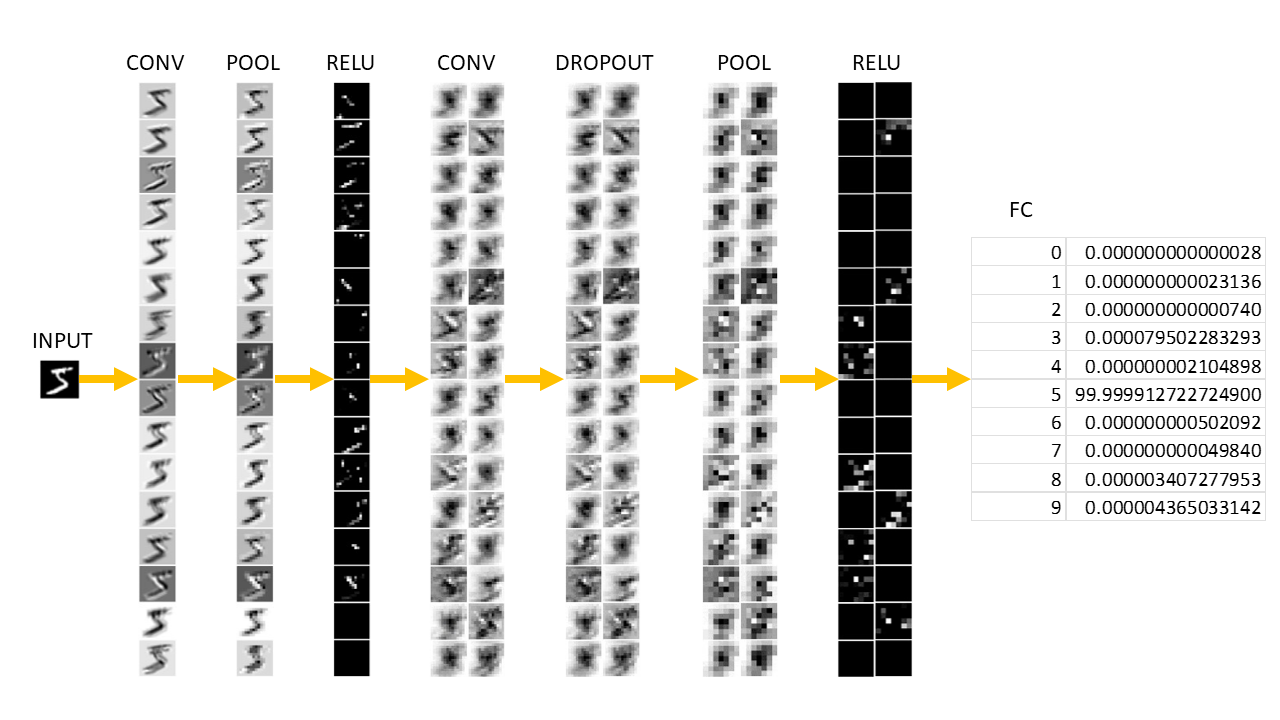